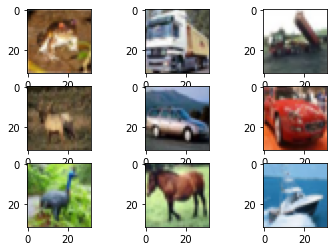

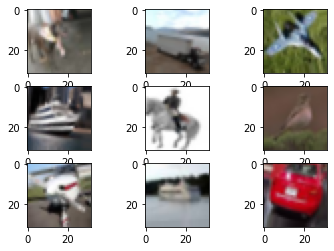

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision


dataset = keras.datasets.cifar10.load_data()



#MIXED PRECISION

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)



(x_train, y_train), (x_test, y_test) = dataset

#["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes_names = [0,1,2,3,4,5,6,7,8,9]

#normalizovanje rgb u opseg od 0 do 1
x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255

y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

#cnn layers: convolution, pooling, convolution+relu, pooling, flatten, dense network na kraju

for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()


#IMAGE AUGMENTATION
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 15,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range= 0.1
)
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
  for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(x_batch[i])
  plt.show()
  break



cnn = keras.models.Sequential([
              
              keras.layers.Conv2D(filters=48, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),             
              keras.layers.BatchNormalization(axis=-1),
              keras.layers.MaxPooling2D((2,2)),

              keras.layers.Conv2D(filters=88, kernel_size=(3,3), activation='relu'),              
              keras.layers.BatchNormalization(axis=-1),
              keras.layers.MaxPooling2D((2,2)),

              #dense
              #keras.layers.Dropout(0.1),
              keras.layers.Flatten(),
              keras.layers.Dense(512, activation='relu'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(10), 
              keras.layers.Activation('softmax', dtype='float32')
              ])

In [9]:
MODEL_PATH = './drive/MyDrive/model2.h5'

#cnn.load_weights(MODEL_PATH)
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#cnn.fit(x_train, y_train, epochs=10)
from keras.callbacks import ModelCheckpoint
filepath = './drive/MyDrive/best2.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             patience=10,
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks=[checkpoint]
cnn.fit(datagen.flow(x_train, y_train, batch_size=256), epochs=100, callbacks=callbacks, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - ETA: 0s - loss: 1.4376 - accuracy: 0.5005
Epoch 1: val_loss improved from inf to 3.40162, saving model to ./drive/MyDrive/best2.hdf5
196/196 [==============================] - 35s 168ms/step - loss: 1.4376 - accuracy: 0.5005 - val_loss: 3.4016 - val_accuracy: 0.1593
Epoch 2/100
196/196 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.6126
Epoch 2: val_loss improved from 3.40162 to 2.55648, saving model to ./drive/MyDrive/best2.hdf5
196/196 [==============================] - 31s 159ms/step - loss: 1.1057 - accuracy: 0.6126 - val_loss: 2.5565 - val_accuracy: 0.3248
Epoch 3/100
196/196 [==============================] - ETA: 0s - loss: 0.9850 - accuracy: 0.6528
Epoch 3: val_loss improved from 2.55648 to 1.04426, saving model to ./drive/MyDrive/best2.hdf5
196/196 [==============================] - 31s 159ms/step - loss: 0.9850 - accuracy: 0.6528 - val_loss: 1.0443 - val_accuracy: 0.6284
Epoch 4/100
196/196 [=====

In [12]:
MODEL_PATH = './drive/MyDrive/model2.h5'
cnn.evaluate(x_test, y_test)
cnn.save_weights(MODEL_PATH)

313/313 [==============================] - 2s 7ms/step - loss: 0.7752 - accuracy: 0.8199


Confusion matrix: 


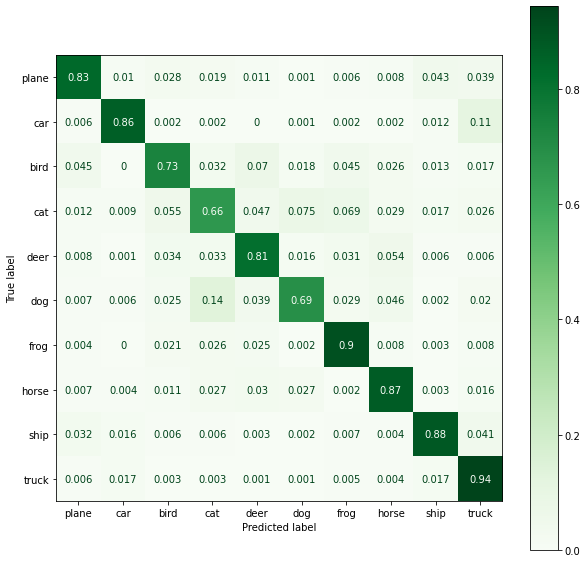

In [13]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

classes_names = [0,1,2,3,4,5,6,7,8,9]
y_pred = cnn.predict(x_test)
y_pred=y_pred.reshape(-1,)
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("Confusion matrix: ")
cm = confusion_matrix(y_test, y_pred_classes, normalize="true", labels=classes_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
